In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
data = np.load('/content/drive/My Drive/UW_ECON/y3/ML_big_data/project/data600.npy')
data

array([[-1967.48370607,  -689.34946355, -1357.08082666, ...,
        -2019.59711085,   928.57022197,  3954.07924073],
       [ -287.95722052,   941.9313741 , -3290.78819244, ...,
        -3904.73381998,  -645.94437435,  2835.49503591],
       [ -595.94722142,  4043.40562734, -3423.93346363, ...,
        -2726.69173722,  -329.49311259,  2460.55910419],
       ...,
       [ -950.0191726 ,  1385.49872145, -3285.19287536, ...,
        -3547.47798293,  -470.14317648,  1945.86185227],
       [-1630.76696252,   -78.0797596 , -4324.73513342, ...,
        -2915.85358702,   713.92215455,  1980.70671743],
       [-3031.17917201,  4096.78403045, -1843.69824028, ...,
        -4230.88388969,  -499.82268958,  2770.13679283]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_data

array([[-1.26221441, -2.67138649,  1.34965783, ...,  1.05749019,
         0.52570996,  1.07721082],
       [ 0.07815549, -1.24961399, -0.4035534 , ..., -0.70168546,
        -0.75088382,  0.09063747],
       [-0.16764029,  1.45353233, -0.52427063, ...,  0.39764221,
        -0.49430969, -0.24005001],
       ...,
       [-0.45021243, -0.8630148 , -0.39848036, ..., -0.36830074,
        -0.60834674, -0.69400475],
       [-0.99349284, -2.13862326, -1.34098966, ...,  0.22111978,
         0.35167639, -0.66327213],
       [-2.11111165,  1.50005525,  0.90846227, ..., -1.00604283,
        -0.63241046,  0.03299255]])

In [ ]:
print(np.min(scaled_data), np.max(scaled_data), np.mean(scaled_data), np.std(scaled_data))

-7.464779400790129 7.929985596366112 -1.14756204538935e-16 0.9999999999999997


In [ ]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model with 3 components
gmms = [GaussianMixture(n_components=i) for i in range(2, 20)]
for gmm in gmms:
  gmm.fit(scaled_data)

# Predict the clusters
label_predictions = [gmm.predict(scaled_data) for gmm in gmms]

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate Silhouette Score
for num_clusters, labels in enumerate(label_predictions, start=2):
  silhouette_avg = silhouette_score(scaled_data, labels)
  print(f"\nSilhouette Score with {num_clusters} clusters: {silhouette_avg}")

  # Calculate Calinski-Harabasz Index
  calinski_harabasz_avg = calinski_harabasz_score(scaled_data, labels)
  print(f"Calinski-Harabasz Index with {num_clusters} clusters: {calinski_harabasz_avg}")

  davies_bouldin_avg = davies_bouldin_score(scaled_data, labels)
  print(f"Davies-Bouldin Index with {num_clusters} clusters: {davies_bouldin_avg}")


Silhouette Score with 2 clusters: 0.040674798167067365
Calinski-Harabasz Index with 2 clusters: 332.25930103790967
Davies-Bouldin Index with 2 clusters: 5.3823492556566945

Silhouette Score with 3 clusters: 0.02039360286246797
Calinski-Harabasz Index with 3 clusters: 254.57169682317152
Davies-Bouldin Index with 3 clusters: 5.481152511380439

Silhouette Score with 4 clusters: 0.01207509509861697
Calinski-Harabasz Index with 4 clusters: 230.194542130176
Davies-Bouldin Index with 4 clusters: 4.8915342269311175

Silhouette Score with 5 clusters: 0.0031130316274739557
Calinski-Harabasz Index with 5 clusters: 210.11909202895228
Davies-Bouldin Index with 5 clusters: 4.87341631039059

Silhouette Score with 6 clusters: -0.0065835815160136335
Calinski-Harabasz Index with 6 clusters: 193.25126217397423
Davies-Bouldin Index with 6 clusters: 4.715588718053849

Silhouette Score with 7 clusters: -0.008795133792285564
Calinski-Harabasz Index with 7 clusters: 176.01972455032046
Davies-Bouldin Index wi

Silhouette Score with 2 clusters: 0.03988457480384592
Calinski-Harabasz Index with 2 clusters: 336.7967846251605

Silhouette Score with 3 clusters: 0.02657478354220791
Calinski-Harabasz Index with 3 clusters: 269.4231844364142

Silhouette Score with 4 clusters: 0.008242183077368877
Calinski-Harabasz Index with 4 clusters: 234.33088862505167

Silhouette Score with 5 clusters: 0.007297918910650481
Calinski-Harabasz Index with 5 clusters: 176.56225278865753

Silhouette Score with 6 clusters: -0.006260171174663819
Calinski-Harabasz Index with 6 clusters: 193.2872535371141

Silhouette Score with 7 clusters: -0.012774052727800933
Calinski-Harabasz Index with 7 clusters: 176.78550107337756

Silhouette Score with 8 clusters: -0.013919090947678597
Calinski-Harabasz Index with 8 clusters: 162.42360821266175

Silhouette Score with 9 clusters: -0.013089517557775685
Calinski-Harabasz Index with 9 clusters: 151.67604792286645

Silhouette Score with 10 clusters: -0.01590719308399706
Calinski-Harabasz Index with 10 clusters: 142.21735345721245

Silhouette Score with 11 clusters: -0.012037285248145952
Calinski-Harabasz Index with 11 clusters: 134.36281891265324

Silhouette Score with 12 clusters: -0.0160331871291924
Calinski-Harabasz Index with 12 clusters: 126.95371083270729

Silhouette Score with 13 clusters: -0.020472780542483048
Calinski-Harabasz Index with 13 clusters: 121.38043898092812

Silhouette Score with 14 clusters: -0.013247222624865657
Calinski-Harabasz Index with 14 clusters: 115.52654412549226

Silhouette Score with 15 clusters: -0.017884464458619232
Calinski-Harabasz Index with 15 clusters: 111.70402699528631

Silhouette Score with 16 clusters: -0.014948610275527281
Calinski-Harabasz Index with 16 clusters: 107.13592393395228

Silhouette Score with 17 clusters: -0.01536085575820537
Calinski-Harabasz Index with 17 clusters: 103.58554031007414

Silhouette Score with 18 clusters: -0.012662116815529553
Calinski-Harabasz Index with 18 clusters: 98.46196304260414

Silhouette Score with 19 clusters: -0.021757016562468402
Calinski-Harabasz Index with 19 clusters: 95.23456838872211

## Neural Net :)



In [ ]:
# first some PCA analysis

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

In [ ]:
pca.components_

array([[-0.05388765, -0.07998187, -0.00598366, ...,  0.07777217,
        -0.04533624,  0.02049207],
       [ 0.01893282,  0.00328803, -0.00926837, ..., -0.01500452,
        -0.01031483, -0.03557353],
       [ 0.03403403, -0.00214578, -0.0375923 , ...,  0.02239029,
         0.02358307, -0.0375725 ],
       ...,
       [ 0.02382509, -0.01582749, -0.01416561, ..., -0.07544114,
         0.0298267 ,  0.03071502],
       [-0.04630035, -0.0187471 ,  0.04101389, ..., -0.00519959,
        -0.00701337,  0.03471594],
       [ 0.04919699,  0.05354029, -0.02631665, ...,  0.00963628,
        -0.05892861,  0.06934428]])

In [ ]:
pca.explained_variance_

array([30.44233535, 21.47914012, 18.60219492, 18.35710003, 15.02057082,
       14.12012657, 13.70442882, 11.88392887, 11.49238777, 11.03422626,
       10.26678688,  9.92529733,  9.06852444,  8.38965421,  8.20233192,
        7.65950465,  7.34540044,  7.03294184,  6.95274353,  6.74558733,
        6.62061866,  6.25078882,  6.22617929,  5.65664379,  5.56963171,
        5.52498982,  5.29591702,  5.09483708,  4.7072337 ,  4.63323701,
        4.4479254 ,  4.36314105,  4.29875534,  4.19355522,  4.0817952 ,
        4.02873894,  3.98143043,  3.81338888,  3.71822723,  3.56914696,
        3.45876788,  3.39236674,  3.27401812,  3.22652983,  3.19714207,
        3.09491222,  2.98323333,  2.96215957,  2.8673235 ,  2.77239234,
        2.70813178,  2.69564536,  2.6294245 ,  2.58688191,  2.54334445,
        2.4679645 ,  2.43819387,  2.40209385,  2.36268328,  2.29961961,
        2.28473833,  2.26143413,  2.22140469,  2.15050357,  2.09231581,
        2.08270963,  2.05198986,  2.00244169,  1.99215179,  1.92

In [ ]:
pca.explained_variance_ratio_

array([5.07321519e-02, 3.57949870e-02, 3.10005578e-02, 3.05921072e-02,
       2.50317813e-02, 2.35311909e-02, 2.28384306e-02, 1.98045675e-02,
       1.91520642e-02, 1.83885381e-02, 1.71096003e-02, 1.65405080e-02,
       1.51126960e-02, 1.39813587e-02, 1.36691861e-02, 1.27645645e-02,
       1.22411098e-02, 1.17203976e-02, 1.15867471e-02, 1.12415213e-02,
       1.10332610e-02, 1.04169396e-02, 1.03759278e-02, 9.42679688e-03,
       9.28179125e-03, 9.20739553e-03, 8.82564571e-03, 8.49054600e-03,
       7.84460495e-03, 7.72128948e-03, 7.41246768e-03, 7.27117455e-03,
       7.16387577e-03, 6.98855977e-03, 6.80231171e-03, 6.71389345e-03,
       6.63505381e-03, 6.35501257e-03, 6.19642569e-03, 5.94798341e-03,
       5.76403667e-03, 5.65337918e-03, 5.45615120e-03, 5.37701196e-03,
       5.32803726e-03, 5.15767122e-03, 4.97155834e-03, 4.93643892e-03,
       4.77839461e-03, 4.62019183e-03, 4.51310161e-03, 4.49229299e-03,
       4.38193593e-03, 4.31103870e-03, 4.23848353e-03, 4.11286284e-03,
      

In [ ]:
# two dimensions pca data

pca2d = PCA(n_components=2)
pca2d.fit(scaled_data)
pca_data2d = pca2d.transform(scaled_data)

In [ ]:
pca3d = PCA(n_components=3)
pca3d.fit(scaled_data)
pca_data3d = pca3d.transform(scaled_data)

In [ ]:
!pip install minisom

In [ ]:
from minisom import MiniSom

In [ ]:
som_shape = (23, 23) # size is ~ 5*sqrt(10000 = n)

soms = MiniSom(som_shape[0], som_shape[1], 600, random_seed=10, sigma=5000, activation_distance='cosine')

soms.train(scaled_data, 30000, verbose=True)

# from https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb
# predict the clustering
winner_coordinates = np.array([soms.winner(x) for x in scaled_data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

/usr/local/lib/python3.11/dist-packages/minisom.py:164: UserWarning:




 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 25.189986371797698


In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
map_name = 'viridis'


<ipython-input-22-4cd773c2104e>:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-22-4cd773c2104e>:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



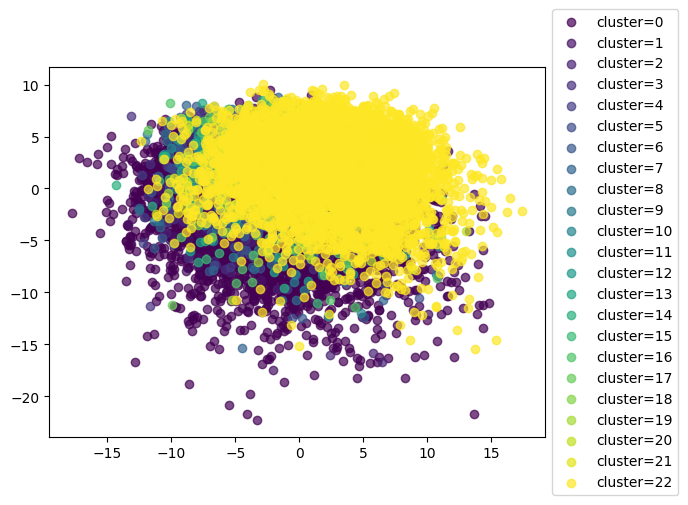

In [ ]:
colormap = cm.get_cmap(map_name, len(np.unique(cluster_index)))

%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for index, c in enumerate(np.unique(cluster_index)):
    color = colormap(index)
    plt.scatter(pca_data2d[cluster_index == c, 0],
                pca_data2d[cluster_index == c, 1], label='cluster='+str(index), alpha=.7,
                c=color)

# # plotting centroids
# for centroid in soms.get_weights():
#     plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
#                 s=80, linewidths=35, color='k', label='centroid')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));



<ipython-input-23-ab284c3c5121>:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-23-ab284c3c5121>:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



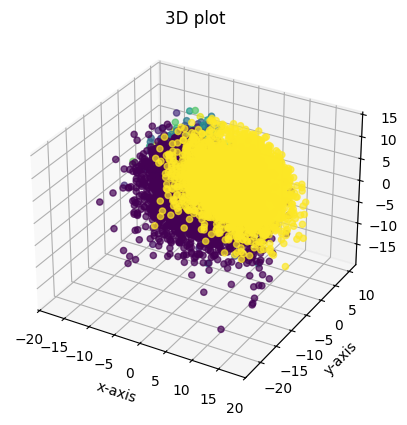

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

map_name = 'viridis'
colormap = cm.get_cmap(map_name, len(np.unique(cluster_index)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# plotting the clusters using the first 3 dimentions of the PCA-data
for index, c in enumerate(np.unique(cluster_index)):
    color = colormap(index)
    ax.scatter(pca_data3d[cluster_index == c, 0],
                pca_data3d[cluster_index == c, 1],
                pca_data3d[cluster_index == c, 2],
                label='cluster='+str(index), alpha=.7,
                c=color)

# # plotting centroids
# for centroid in soms.get_weights():
#     plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
#                 s=80, linewidths=35, color='k', label='centroid')
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show();

In [ ]:
import plotly.express as px
import numpy as np # Assuming you need numpy

# Assuming cluster_index and pca_data3d are already defined
# based on your previous code cells

# Create a dictionary or pandas DataFrame to hold your data
# Plotly often works well with structured data


# 1. Find unique labels
unique_labels = sorted(list(set(cluster_index)))

# 2. Create a mapping
label_mapping = {label: index for index, label in enumerate(unique_labels)}

# 3. Apply the mapping
zero_based_clusters = np.array([label_mapping[label] for label in cluster_index])

plot_data = {
    'pca_x': pca_data3d[:, 0],
    'pca_y': pca_data3d[:, 1],
    'pca_z': pca_data3d[:, 2],
    'cluster': zero_based_clusters.astype(str) # Convert cluster labels to strings for color mapping
}

# Create the interactive 3D scatter plot
fig = px.scatter_3d(plot_data, x='pca_x', y='pca_y', z='pca_z',
                    color='cluster', # Color by cluster
                    title='Interactive 3D Plot of SOM Clusters',
                    color_continuous_scale=px.colors.sequential.Viridis)

# Display the plot
fig.show()

In [ ]:
# prompt: calculate silhouette, Calinski-Harabasz, Davies-Bouldin, Contingency Matrix, and  Pair Confusion matrix for the above results


# https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
# silhouette_score -> not good for highdimensional data; measures difference between mean distance in cluster and nearest cluster as a ratio
# davies_bouldin_score -> a lower Davies-Bouldin index relates to a model with better separation between the clusters.
# calinski_harabasz_score -> index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):
import numpy as np
from sklearn.metrics import davies_bouldin_score, confusion_matrix, pair_confusion_matrix, silhouette_score, calinski_harabasz_score

# Calculate Davies-Bouldin Index for GMM results
print("\n--- Scores for SOM ---")
davies_bouldin_avg = davies_bouldin_score(scaled_data, zero_based_clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
silhouette_avg = silhouette_score(scaled_data, zero_based_clusters)
print(f"Silhouette Score: {silhouette_avg}")
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, zero_based_clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")



--- Scores for SOM ---
Davies-Bouldin Index: 11.40123558546461
Silhouette Score: -0.003696408702285198
Calinski-Harabasz Index: 13.437482689997976


In [ ]:
# from scipy.spatial.distance import cosine
# import plotly.express as px

# # Calculate cosine distances between the first 3 PCA eigenvectors and each data point
# cosine_distances_pca1 = [cosine(pca3d.components_[0], point) for point in scaled_data]
# cosine_distances_pca2 = [cosine(pca3d.components_[1], point) for point in scaled_data]
# cosine_distances_pca3 = [cosine(pca3d.components_[2], point) for point in scaled_data]

# # Combine distances and cluster labels for plotting
# plot_data_cosine = {
#     'cosine_distance_pca1': cosine_distances_pca1,
#     'cosine_distance_pca2': cosine_distances_pca2,
#     'cosine_distance_pca3': cosine_distances_pca3,
#     'cluster': cluster_index.astype(str) # Use the same cluster index from the SOM
# }

# # Create the scatter plot
# fig = px.scatter(plot_data_cosine, x='cosine_distance_pca1', y='cosine_distance_pca2',
#                     color='cluster', # Color by cluster
#                     title='Interactive 3D Plot of SOM Clusters', trendline="ols")
# fig.show()
# fig = px.scatter(plot_data_cosine, x='cosine_distance_pca1', y='cosine_distance_pca3',
#                     color='cluster', # Color by cluster
#                     title='Interactive 3D Plot of SOM Clusters', trendline="ols")
# fig.show()
# fig = px.scatter(plot_data_cosine, x='cosine_distance_pca2', y='cosine_distance_pca3',
#                     color='cluster', # Color by cluster
#                     title='Interactive 3D Plot of SOM Clusters', trendline="ols")
# fig.show()

/usr/local/lib/python3.11/dist-packages/minisom.py:164: UserWarning:




 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 25.190149842328445


<ipython-input-26-ebf87b74830b>:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-26-ebf87b74830b>:17: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



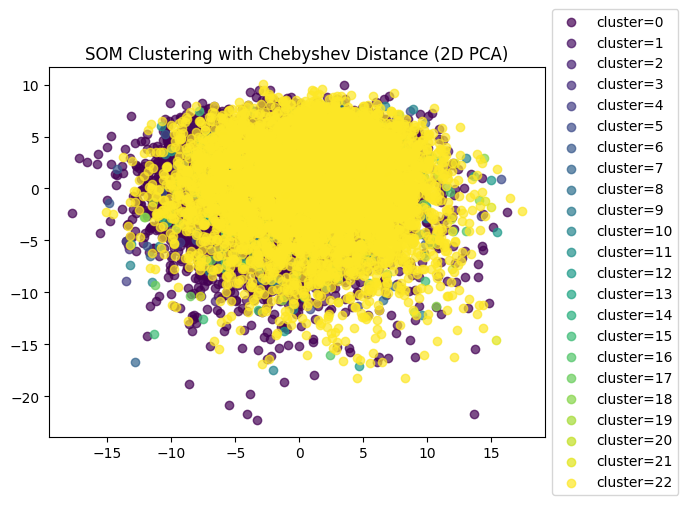

<ipython-input-26-ebf87b74830b>:26: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-26-ebf87b74830b>:33: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



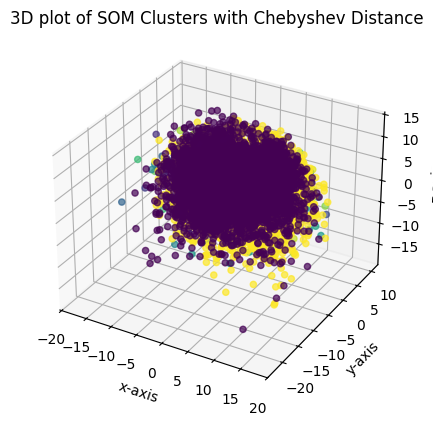

In [ ]:
# prompt: do above clustering with chebyshev distance instead

import matplotlib.pyplot as plt
import numpy as np
# do above clustering with chebyshev distance instead
soms_chebyshev = MiniSom(som_shape[0], som_shape[1], 600, random_seed=10, sigma=10000, activation_distance='chebyshev')
soms_chebyshev.train(scaled_data, 20000, verbose=True)
# from https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb
winner_coordinates_chebyshev = np.array([soms_chebyshev.winner(x) for x in scaled_data]).T
cluster_index_chebyshev = np.ravel_multi_index(winner_coordinates_chebyshev, som_shape)
map_name = 'viridis'
colormap_chebyshev = cm.get_cmap(map_name, len(np.unique(cluster_index_chebyshev)))

# plotting the clusters using the first 2 dimentions of the data
for index, c in enumerate(np.unique(cluster_index_chebyshev)):
    color = colormap_chebyshev(index)
    plt.scatter(pca_data2d[cluster_index_chebyshev == c, 0],
                pca_data2d[cluster_index_chebyshev == c, 1], label='cluster='+str(index), alpha=.7,
                c=color)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('SOM Clustering with Chebyshev Distance (2D PCA)')
plt.show()

map_name = 'viridis'
colormap_chebyshev = cm.get_cmap(map_name, len(np.unique(cluster_index_chebyshev)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# plotting the clusters using the first 3 dimentions of the PCA-data
for index, c in enumerate(np.unique(cluster_index_chebyshev)):
    color = colormap_chebyshev(index)
    ax.scatter(pca_data3d[cluster_index_chebyshev == c, 0],
                pca_data3d[cluster_index_chebyshev == c, 1],
                pca_data3d[cluster_index_chebyshev == c, 2],
                label='cluster='+str(index), alpha=.7,
                c=color)

ax.set_title("3D plot of SOM Clusters with Chebyshev Distance")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show();

# Create a dictionary or pandas DataFrame to hold your data for interactive plot
plot_data_chebyshev = {
    'pca_x': pca_data3d[:, 0],
    'pca_y': pca_data3d[:, 1],
    'pca_z': pca_data3d[:, 2],
    'cluster': cluster_index_chebyshev.astype(str) # Convert cluster labels to strings for color mapping
}

# Create the interactive 3D scatter plot
fig_chebyshev = px.scatter_3d(plot_data_chebyshev, x='pca_x', y='pca_y', z='pca_z',
                              color='cluster', # Color by cluster
                              title='Interactive 3D Plot of SOM Clusters with Chebyshev Distance')

# Display the plot
fig_chebyshev.show()


In [ ]:
# prompt: calculate silhouette, Calinski-Harabasz, Davies-Bouldin, Contingency Matrix, and  Pair Confusion matrix for the above results

import numpy as np
from sklearn.metrics import davies_bouldin_score, confusion_matrix, pair_confusion_matrix, silhouette_score, calinski_harabasz_score

print("\n--- Scores for SOM Chebyshev---")
davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_index_chebyshev)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
# confusion_matrix_avg = confusion_matrix(cluster_index, cluster_index_chebyshev)
# print(f"Confusion Matrix: {confusion_matrix_avg}")
# pair_confusion_matrix_avg = pair_confusion_matrix(cluster_index, cluster_index)
# print(f"Pair Confusion Matrix: {pair_confusion_matrix_avg}")
silhouette_avg = silhouette_score(scaled_data, cluster_index_chebyshev)
print(f"Silhouette Score: {silhouette_avg}")
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, cluster_index_chebyshev)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")



--- Scores for SOM Chebyshev---
Davies-Bouldin Index: 7.400318526378243
Silhouette Score: -0.03334639486779961
Calinski-Harabasz Index: 4.407773146343785


/usr/local/lib/python3.11/dist-packages/minisom.py:164: UserWarning:




 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 25.190197975991286


<ipython-input-36-213bf1b8505e>:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-36-213bf1b8505e>:17: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



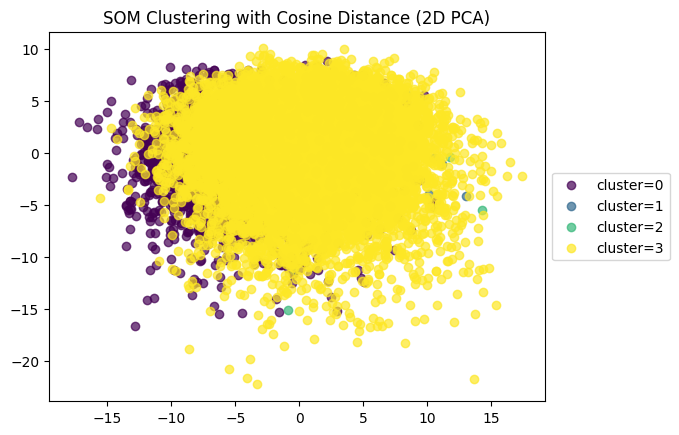

<ipython-input-36-213bf1b8505e>:26: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-36-213bf1b8505e>:33: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



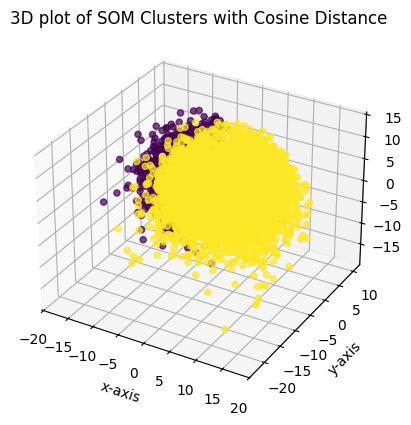

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
som_shape = (4, 4)
soms_cosine = MiniSom(som_shape[0], som_shape[1], 600, random_seed=10, sigma=10000,
                      activation_distance='euclidean', neighborhood_function='mexican_hat')
soms_cosine.train(scaled_data, 20000, verbose=True)
# from https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb
winner_coordinates_cosine = np.array([soms_cosine.winner(x) for x in scaled_data]).T
cluster_index_cosine = np.ravel_multi_index(winner_coordinates_cosine, som_shape)
map_name = 'viridis'
colormap_cosine = cm.get_cmap(map_name, len(np.unique(cluster_index_cosine)))

# plotting the clusters using the first 2 dimentions of the data
for index, c in enumerate(np.unique(cluster_index_cosine)):
    color = colormap_cosine(index)
    plt.scatter(pca_data2d[cluster_index_cosine == c, 0],
                pca_data2d[cluster_index_cosine == c, 1], label='cluster='+str(index), alpha=.7,
                c=color)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('SOM Clustering with euclidean Distance (2D PCA)')
plt.show()

map_name = 'viridis'
colormap_cosine = cm.get_cmap(map_name, len(np.unique(cluster_index_cosine)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# plotting the clusters using the first 3 dimentions of the PCA-data
for index, c in enumerate(np.unique(cluster_index_cosine)):
    color = colormap_cosine(index)
    ax.scatter(pca_data3d[cluster_index_cosine == c, 0],
                pca_data3d[cluster_index_cosine == c, 1],
                pca_data3d[cluster_index_cosine == c, 2],
                label='cluster='+str(index), alpha=.7,
                c=color)

ax.set_title("3D plot of SOM Clusters with euclidean Distance")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show();

# Create a dictionary or pandas DataFrame to hold your data for interactive plot
plot_data_cosine = {
    'pca_x': pca_data3d[:, 0],
    'pca_y': pca_data3d[:, 1],
    'pca_z': pca_data3d[:, 2],
    'cluster': cluster_index_cosine.astype(str) # Convert cluster labels to strings for color mapping
}

# Create the interactive 3D scatter plot
fig_cosine = px.scatter_3d(plot_data_cosine, x='pca_x', y='pca_y', z='pca_z',
                           color='cluster', # Color by cluster
                           title='Interactive 3D Plot of SOM Clusters with euclidean Distance')

# Display the plot
fig_cosine.show()


In [ ]:
import numpy as np
from sklearn.metrics import davies_bouldin_score, confusion_matrix, pair_confusion_matrix, silhouette_score, calinski_harabasz_score

print("\n--- Scores for SOM Chebyshev---")
davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_index_cosine)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
# confusion_matrix_avg = confusion_matrix(cluster_index, cluster_index_chebyshev)
# print(f"Confusion Matrix: {confusion_matrix_avg}")
# pair_confusion_matrix_avg = pair_confusion_matrix(cluster_index, cluster_index)
# print(f"Pair Confusion Matrix: {pair_confusion_matrix_avg}")
silhouette_avg = silhouette_score(scaled_data, cluster_index_cosine)
print(f"Silhouette Score: {silhouette_avg}")
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, cluster_index_cosine)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")



--- Scores for SOM Chebyshev---
Davies-Bouldin Index: 5.553954623783589
Silhouette Score: 0.018558751412229898
Calinski-Harabasz Index: 52.772524434115674


In [ ]:
from sklearn.decomposition import PCA

# ① 先实例化模型（此时只有 n_components 参数，没有 n_components_ 属性）
pca_95p = PCA(n_components=0.95)

# ② 拟合 + 变换
data_pca_95p = pca_95p.fit_transform(scaled_data)   # 这里才建立内部属性

# ③ 现在再访问带下划线的属性就不会报错
print("实际保留维度:", pca_95p.n_components_)   # 例如会打印 178
print("变换后 shape :", data_pca_95p.shape)      # (10000, 178)

pca3_95 = PCA(n_components=3).fit(data_pca_95p)
pca_data3d_95 = pca3_95.transform(data_pca_95p)  # shape: (n_samples, 3)


实际保留维度: 326
变换后 shape : (10000, 326)


 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 20.663670835261303
(2, 10000)
(10000,)


<ipython-input-27-8fd87c4fa196>:16: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-27-8fd87c4fa196>:21: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



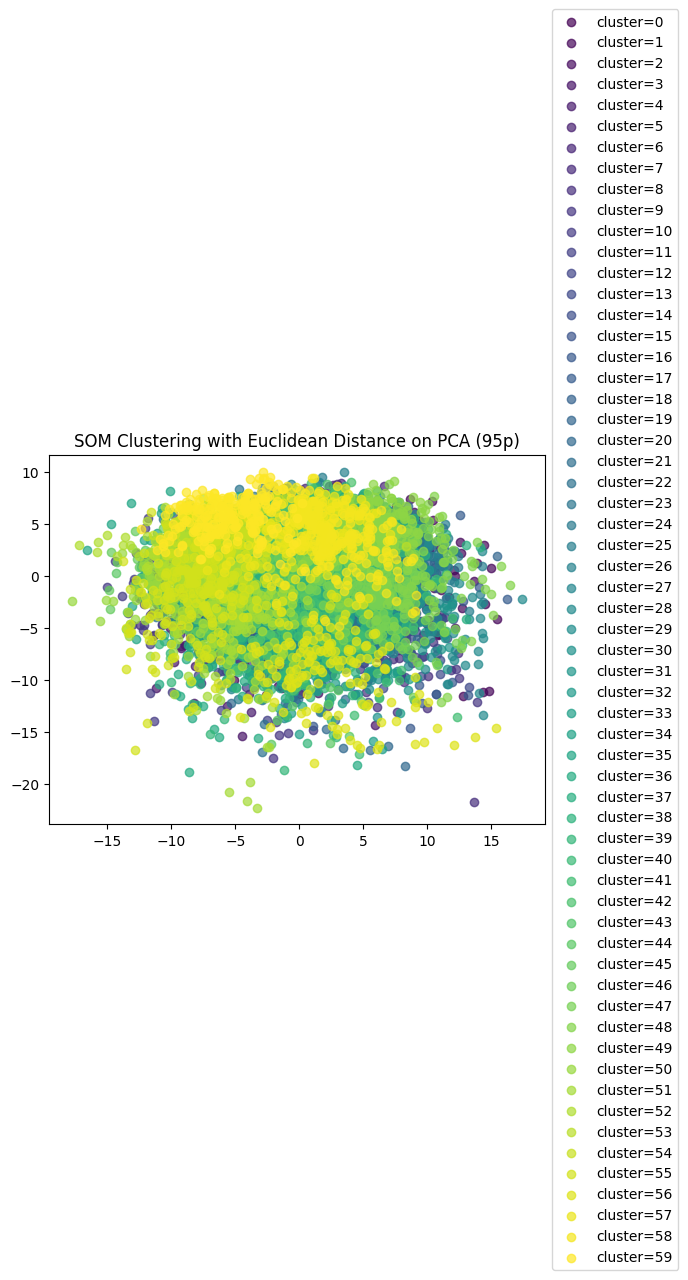

<ipython-input-27-8fd87c4fa196>:30: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-27-8fd87c4fa196>:37: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



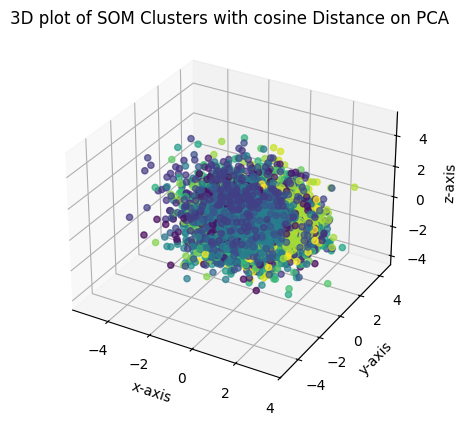

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
# do above clustering with euclidean distance
som_shape = (23, 23) #
soms_pca95 = MiniSom(som_shape[0], som_shape[1], data_pca_95p.shape[1], random_seed=10, sigma=1.0,
                         activation_distance='cosine', neighborhood_function='triangle')
soms_pca95.train(data_pca_95p, 20000, verbose=True)

# from https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb
winner_coordinates_pca95 = np.array([soms_pca95.winner(x) for x in data_pca_95p]).T
print(winner_coordinates_pca95.shape)
cluster_index_pca95 = np.ravel_multi_index(winner_coordinates_pca95, som_shape)
print(cluster_index_pca95.shape)
map_name = 'viridis'
colormap_pca95 = cm.get_cmap(map_name, len(np.unique(cluster_index_pca95)))

# plotting the clusters using the first 2 dimentions of the PCA data
for index, c in enumerate(np.unique(cluster_index_pca95)):
    color = colormap_pca95(index)
    plt.scatter(data_pca_95p[cluster_index_pca95 == c, 0],
                data_pca_95p[cluster_index_pca95 == c, 1], label='cluster='+str(index), alpha=.7,
                c=color)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('SOM Clustering with Euclidean Distance on PCA (95p)')
plt.show()

map_name = 'viridis'
colormap_euclidean = cm.get_cmap(map_name, len(np.unique(cluster_index_pca95)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# plotting the clusters using the first 3 dimentions of the PCA-data
for index, c in enumerate(np.unique(cluster_index_pca95)):
    color = colormap_euclidean(index)
    ax.scatter(scaled_data[cluster_index_pca95 == c, 0],
                scaled_data[cluster_index_pca95 == c, 1],
                scaled_data[cluster_index_pca95 == c, 2],
                label='cluster='+str(index), alpha=.7,
                c=color)

ax.set_title("3D plot of SOM Clusters with cosine Distance on PCA")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show();

# Create a dictionary or pandas DataFrame to hold your data for interactive plot
plot_data_euclidean = {
    'pca_x': pca_data3d_95[:, 0],
    'pca_y': pca_data3d_95[:, 1],
    'pca_z': pca_data3d_95[:, 2],
    'cluster': cluster_index_pca95.astype(str) # Convert cluster labels to strings for color mapping
}

# Create the interactive 3D scatter plot
fig_euclidean = px.scatter_3d(plot_data_euclidean, x='pca_x', y='pca_y', z='pca_z',
                           color='cluster', # Color by cluster
                           title='Interactive 3D Plot of SOM Clusters with Euclidean Distance on PCA 95P')

# Display the plot
fig_euclidean.show()



In [ ]:
# This is the final dataset that I want to save

print(cluster_index_pca95.shape)

print(np.unique(cluster_index_pca95).size)

np.savetxt('/content/drive/My Drive/UW_ECON/y3/ML_big_data/project/clust2_out.txt', cluster_index_pca95, fmt='%d')   # 每行一个整数

(10000,)
60


In [ ]:
from sklearn.metrics import (
    davies_bouldin_score,
    silhouette_score,
    calinski_harabasz_score
)

# 如果想在 95 % PCA 空间评估，最好用降维后的特征：
X_eval = data_pca_95p          # shape: (n_samples, k)
labels = cluster_index_pca95   # shape: (n_samples,)

print("\n--- Scores for SOM (PCA‑95%) ---")
print("Davies‑Bouldin :", davies_bouldin_score(X_eval, labels))
print("Silhouette     :", silhouette_score(X_eval, labels))
print("Calinski‑Harabasz :", calinski_harabasz_score(X_eval, labels))


--- Scores for SOM (PCA‑95%) ---
Davies‑Bouldin : 3.6132170159208457
Silhouette     : -0.012695809619832044
Calinski‑Harabasz : 47.41051383231697


 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 20.860802247172302
(2, 10000)
(10000,)


<ipython-input-26-78b295977c6b>:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-26-78b295977c6b>:23: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



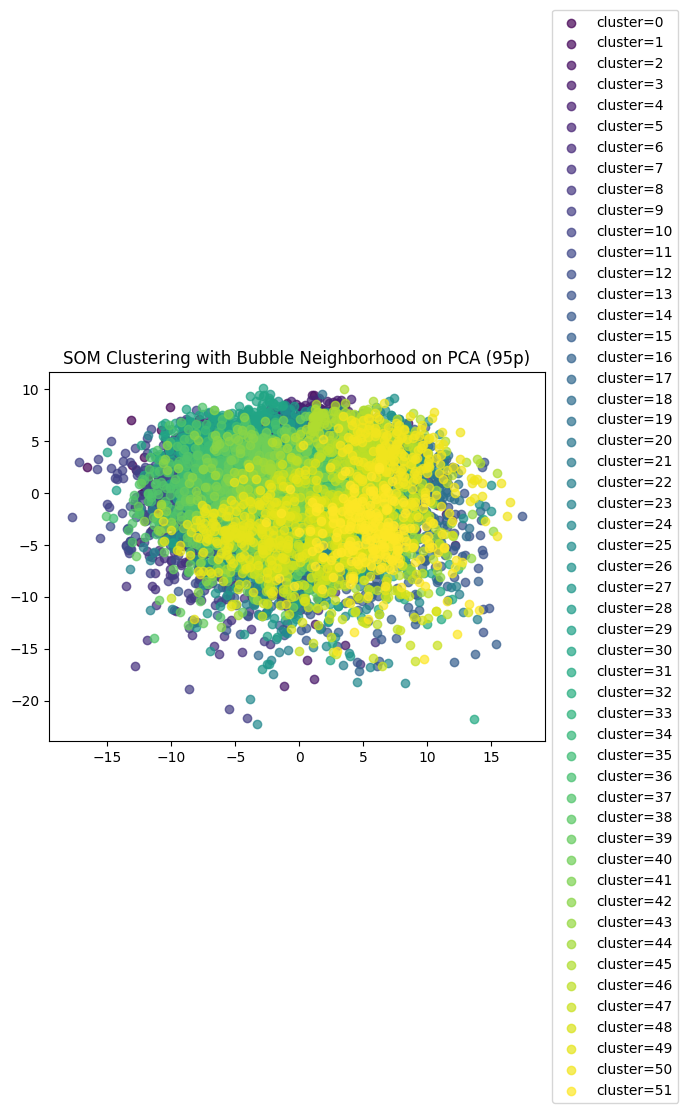

<ipython-input-26-78b295977c6b>:32: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-26-78b295977c6b>:39: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



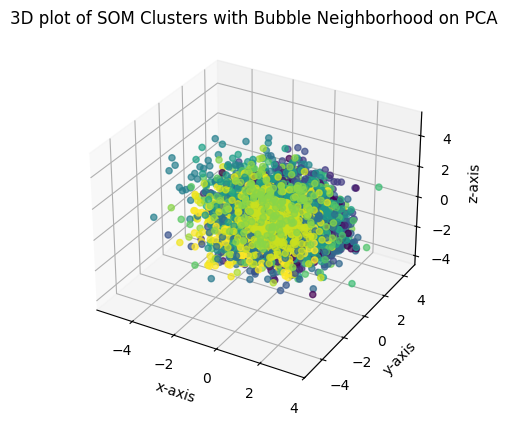


--- Scores for SOM PCA95 with Bubble Neighborhood ---
Davies-Bouldin Index: 3.918148752127628
Silhouette Score: -0.021646542888172415
Calinski-Harabasz Index: 48.124152772403846


In [ ]:
# prompt: do the above with bubble instead of triangle

import matplotlib.pyplot as plt
import numpy as np
# do above clustering with bubble instead
som_shape = (10, 10) #
soms_pca95_bubble = MiniSom(som_shape[0], som_shape[1], data_pca_95p.shape[1], random_seed=10, sigma=1.0,
                         activation_distance='cosine', neighborhood_function='bubble', topology='rectangular',
                            sigma_decay_function='linear_decay_to_one', decay_function='linear_decay_to_zero')
soms_pca95_bubble.train(data_pca_95p, 20000, verbose=True)

# from https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb
winner_coordinates_pca95_bubble = np.array([soms_pca95_bubble.winner(x) for x in data_pca_95p]).T
print(winner_coordinates_pca95_bubble.shape)
cluster_index_pca95_bubble = np.ravel_multi_index(winner_coordinates_pca95_bubble, som_shape)
print(cluster_index_pca95_bubble.shape)
map_name = 'viridis'
colormap_pca95_bubble = cm.get_cmap(map_name, len(np.unique(cluster_index_pca95_bubble)))

# plotting the clusters using the first 2 dimentions of the PCA data
for index, c in enumerate(np.unique(cluster_index_pca95_bubble)):
    color = colormap_pca95_bubble(index)
    plt.scatter(data_pca_95p[cluster_index_pca95_bubble == c, 0],
                data_pca_95p[cluster_index_pca95_bubble == c, 1], label='cluster='+str(index), alpha=.7,
                c=color)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('SOM Clustering with Bubble Neighborhood on PCA (95p)')
plt.show()

map_name = 'viridis'
colormap_bubble = cm.get_cmap(map_name, len(np.unique(cluster_index_pca95_bubble)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# plotting the clusters using the first 3 dimentions of the PCA-data
for index, c in enumerate(np.unique(cluster_index_pca95_bubble)):
    color = colormap_bubble(index)
    ax.scatter(scaled_data[cluster_index_pca95_bubble == c, 0],
                scaled_data[cluster_index_pca95_bubble == c, 1],
                scaled_data[cluster_index_pca95_bubble == c, 2],
                label='cluster='+str(index), alpha=.7,
                c=color)

ax.set_title("3D plot of SOM Clusters with Bubble Neighborhood on PCA")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show();

# Create a dictionary or pandas DataFrame to hold your data for interactive plot
plot_data_bubble = {
    'pca_x': pca_data3d_95[:, 0],
    'pca_y': pca_data3d_95[:, 1],
    'pca_z': pca_data3d_95[:, 2],
    'cluster': cluster_index_pca95_bubble.astype(str) # Convert cluster labels to strings for color mapping
}

# Create the interactive 3D scatter plot
fig_bubble = px.scatter_3d(plot_data_bubble, x='pca_x', y='pca_y', z='pca_z',
                           color='cluster', # Color by cluster
                           title='Interactive 3D Plot of SOM Clusters with Bubble Neighborhood on PCA 95P')

# Display the plot
fig_bubble.show()


print("\n--- Scores for SOM PCA95 with Bubble Neighborhood ---")
davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_index_pca95_bubble)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
silhouette_avg = silhouette_score(scaled_data, cluster_index_pca95_bubble)
print(f"Silhouette Score: {silhouette_avg}")
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, cluster_index_pca95_bubble)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")